In [1]:
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = (10,7)
df = pd.read_csv("pita.csv", delimiter=',', dtype={'time':'str','unix_time':'str','ihwp':np.int32, 'pita':np.float64}, parse_dates=['time','unix_time'])
df['ihwp_out'] = 1-df['ihwp'] 

In [2]:
nIn = df.query("ihwp == 1 & pita != 0")['ihwp'].sum()
pita_in = df.query("ihwp == 1 & pita != 0")['pita'].sum()
print("Average in", pita_in/nIn*3.1415927/2)
nOut = df.query("ihwp_out == 1 & pita != 0")['ihwp_out'].sum()
pita_out = df.query("ihwp_out == 1 & pita != 0")['pita'].sum()
print("Average out retardance", pita_out/nOut*3.1415927/2)

print("Average in voltage", pita_in/nIn)
print("Average out voltage", pita_out/nOut)





Average in -0.0027073214256947598
Average out retardance -0.015483802416098171
Average in voltage -0.0017235343242901983
Average out voltage -0.00985729462390091


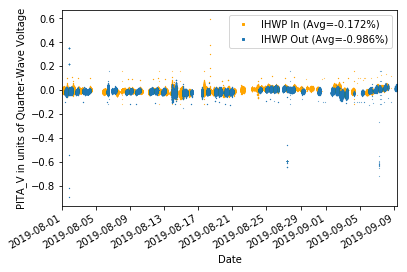

In [4]:
df_new = df[df['pita'] != 0]
df_new.shape
df_in = df_new[df_new['ihwp']==1]
df_out = df_new[df_new['ihwp']==0]
fig, ax = plt.subplots()
#ax2 = ax.twinx()

df_in.plot(x='time',y='pita',style=',', color='orange', ax=ax, label='IHWP In (Avg=-0.172%)',marker='s', markersize=12./fig.dpi)
df_out.plot(style=',',x='time',y='pita', ax=ax, label='IHWP Out (Avg=-0.986%)',marker='s',markersize=12./fig.dpi)
plt.ylabel('PITA_V in units of Quarter-Wave Voltage')
plt.xlabel('Date')
plt.legend(markerscale=12)
#plt.figure(figsize=(10,7))
fig1=plt.gcf()
fig1.savefig('../pitavst.png',bbox_inches='tight')
plt.show()


#print(nIn+nOut)